# Capstone Assignment part 2

# Introduction/Business problem

# Data Source 1

# Use the Data source on no of restaurants in various cities

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_590928f7f599463397dc68aaee279193 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TGpEV3YR--A7xLNQBKrl0ImR7rQnMoy7bmn4cpb_e3DG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')
body = client_590928f7f599463397dc68aaee279193.get_object(Bucket='arunasfirstproject-donotdelete-pr-gw4xfiuqojl49x',Key='Number_of_restaurants_per_100,000_population_8112018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,City,Figure,Per capita,Date,Source,Notes
0,Amsterdam,53.4,NaN,2013,Trade Association for Horeca and Catering,NaN
1,Austin,207.2,NaN,2018,Restaurant Guide - Austin Chronicle,NaN
2,Bogotá,418.6,NaN,2017,Cámara de Comercio de Bogotá,NaN
3,Brussels,360.4,NaN,2013,FOD Economie ADSEI,NaN
4,Buenos Aires,221.3,NaN,2016,FEHGRA,NaN


Read a CSV file that shows no of restaurants per 100,000 people 
Convert it to a data frame
locate Toronto data.

In [2]:
df = df_data_2[['City','Figure']]

In [3]:
df.describe


<bound method NDFrame.describe of              City   Figure
0       Amsterdam     53.4
1          Austin    207.2
2          Bogotá    418.6
3        Brussels    360.4
4    Buenos Aires    221.3
5          Dublin     32.0
6       Edinburgh     27.7
7        Helsinki     23.3
8       Hong Kong    185.5
9        Istanbul      7.9
10   Johannesburg    132.4
11         Lisbon   1256.0
12         London    201.1
13    Los Angeles    290.8
14         Madrid    200.1
15      Melbourne     95.2
16          Milan    636.2
17       Montréal    212.0
18         Moscow     24.5
19       New York    309.6
20           Oslo     59.4
21          Paris    366.6
22           Rome    477.0
23  San Francisco    457.4
24          Seoul    848.2
25       Shenzhen    503.7
26      Singapore     24.8
27      Stockholm    108.3
28         Sydney    400.4
29         Taipei    307.6
30          Tokyo  1,099.5
31        Toronto    272.5>

As you can See in the Data Toronto has 272 restaurants per 100,000 people.

In [4]:
df.dtypes

City      object
Figure    object
dtype: object

As you can see that the data type is Object for the numrical column Figure. we cant do any manipulations until we convert the data type.

In [5]:
df=df.replace(regex=r'1,099.5', value='1099.5')

# Data source 2

now lets obtain <b>Data source 2 /<B>- on average percapita in the cities.

In [6]:

body = client_590928f7f599463397dc68aaee279193.get_object(Bucket='arunasfirstproject-donotdelete-pr-gw4xfiuqojl49x',Key='Average_income_per_capita_per_year_(ppp)_5112018.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,City,Figure,Per capita,Date,Source,Notes
0,Amsterdam,"$19,271",NaN,2012,Statistics Netherlands/TNO,NaN
1,Netherlands,"$17,492",NaN,2009,Statistics Netherlands /RIO,NaN
2,Austin,"$39,103",NaN,2016,Census Reporter,ACS 2016 1-year
3,United States,"$28,155",NaN,2013,US Census Bureau,NaN
4,Bogotá,"$9,004",NaN,2014,Observatorio de Desarrollo Económico de Bogotá...,Base de Datos Dinámica Económica - Calidad de ...


In [7]:
df.head()

,City,Figure
0,Amsterdam,53.4
1,Austin,207.2
2,Bogotá,418.6
3,Brussels,360.4
4,Buenos Aires,221.3


# Merge 2 Data sets

In [8]:
dfcom = pd.merge(df, df_data_4, how='inner', on = 'City')

In [9]:
dfcom

,City,Figure_x,Figure_y,Per capita,Date,Source,Notes
0,Amsterdam,53.4,"$19,271",NaN,2012,Statistics Netherlands/TNO,NaN
1,Austin,207.2,"$39,103",NaN,2016,Census Reporter,ACS 2016 1-year
2,Bogotá,418.6,"$9,004",NaN,2014,Observatorio de Desarrollo Económico de Bogotá...,Base de Datos Dinámica Económica - Calidad de ...
3,Buenos Aires,221.3,"$10,080",NaN,2016,NaN,sueldo de un asalariado; datos de elaboración ...
4,Dublin,32.0,"$39,571",NaN,2015,Central Statistics Office,NaN
5,Edinburgh,27.7,"$30,615",NaN,2016,Office of National Statistics (ONS),NaN
6,Helsinki,23.3,"$32,893",NaN,2016,Statistics Finland,NaN
7,Hong Kong,185.5,"$33,601",NaN,2016,Hong Kong Year Book 2016,NaN
8,Istanbul,7.9,"$25,000",NaN,2014,Istanbul Development Agency,NaN
9,Johannesburg,132.4,"$11,591",NaN,2009,State of the Cities Report 2011,NaN


In [10]:
dfcom.dtypes

City           object
Figure_x       object
Figure_y       object
Per capita    float64
Date           object
Source         object
Notes          object
dtype: object

In [11]:
dfcom =dfcom.drop(['Per capita', 'Date', 'Source', 'Notes'], axis=1)

In [12]:
dfcom.Figure_y.str.replace('$','')

0     19,271 
1     39,103 
2      9,004 
3     10,080 
4     39,571 
5     30,615 
6     32,893 
7     33,601 
8     25,000 
9     11,591 
10    38,537 
11    29,301 
12    57,571 
13    46,402 
14    31,807 
15     6,476 
16    34,099 
17    49,300 
18    29,723 
19    36,092 
20    55,567 
21    23,445 
22    14,913 
23    54,224 
24    40,455 
25    46,917 
26    60,678 
27    33,563 
Name: Figure_y, dtype: object

# Remove $ and , in the numeric columns

In [13]:
dfcom.Figure_y=dfcom.Figure_y.str.replace(',','')

In [14]:
dfcom.Figure_y=dfcom.Figure_y.str.replace('$','')

In [15]:
dfcom

,City,Figure_x,Figure_y
0,Amsterdam,53.4,19271
1,Austin,207.2,39103
2,Bogotá,418.6,9004
3,Buenos Aires,221.3,10080
4,Dublin,32.0,39571
5,Edinburgh,27.7,30615
6,Helsinki,23.3,32893
7,Hong Kong,185.5,33601
8,Istanbul,7.9,25000
9,Johannesburg,132.4,11591


In [16]:
dfcom.Figure_x=dfcom.Figure_x.astype(float)

In [17]:
dfcom.Figure_y=dfcom.Figure_y.astype(float)

In [18]:
dfcom.head()

,City,Figure_x,Figure_y
0,Amsterdam,53.4,19271.0
1,Austin,207.2,39103.0
2,Bogotá,418.6,9004.0
3,Buenos Aires,221.3,10080.0
4,Dublin,32.0,39571.0


In [19]:
dfcom.sort_values(by=['Figure_y'])

,City,Figure_x,Figure_y
15,Moscow,24.5,6476.0
2,Bogotá,418.6,9004.0
3,Buenos Aires,221.3,10080.0
9,Johannesburg,132.4,11591.0
22,Shenzhen,503.7,14913.0
0,Amsterdam,53.4,19271.0
21,Seoul,848.2,23445.0
8,Istanbul,7.9,25000.0
11,Los Angeles,290.8,29301.0
18,Paris,366.6,29723.0


# we need to establish if there is an correlation between 2 columns in this data set. we use this seaborn data visualization feature

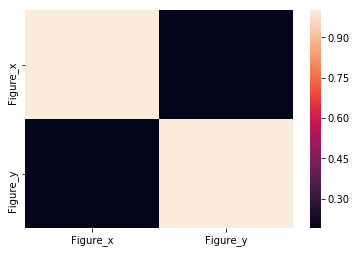

In [21]:
import seaborn as sns
corr = dfcom.corr(method="pearson")
sns.heatmap(corr)

# As you can see it is NOT correlated, in this seaborn heatmap

In [22]:
dfcom.Figure_x=dfcom.Figure_y/100

In [23]:
dfcom.Figure_x.mean

<bound method Series.mean of 0     192.71
1     391.03
2      90.04
3     100.80
4     395.71
5     306.15
6     328.93
7     336.01
8     250.00
9     115.91
10    385.37
11    293.01
12    575.71
13    464.02
14    318.07
15     64.76
16    340.99
17    493.00
18    297.23
19    360.92
20    555.67
21    234.45
22    149.13
23    542.24
24    404.55
25    469.17
26    606.78
27    335.63
Name: Figure_x, dtype: float64>

In [24]:
dfcom.Figure_y.mean

<bound method Series.mean of 0     19271.0
1     39103.0
2      9004.0
3     10080.0
4     39571.0
5     30615.0
6     32893.0
7     33601.0
8     25000.0
9     11591.0
10    38537.0
11    29301.0
12    57571.0
13    46402.0
14    31807.0
15     6476.0
16    34099.0
17    49300.0
18    29723.0
19    36092.0
20    55567.0
21    23445.0
22    14913.0
23    54224.0
24    40455.0
25    46917.0
26    60678.0
27    33563.0
Name: Figure_y, dtype: float64>

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# You can also use a Scatter plot to visualize the correlation.

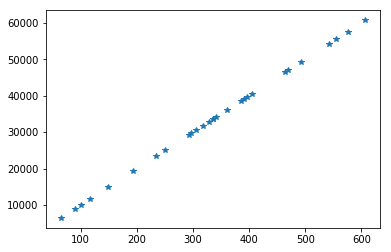

In [27]:
plt.plot( 'Figure_x', 'Figure_y', data=dfcom, linestyle='none', marker= '*')
plt.show()


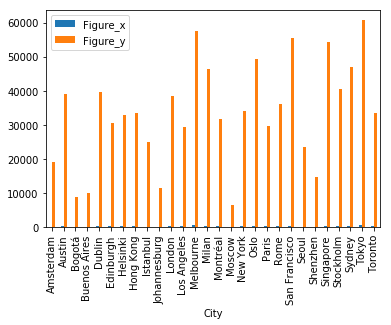

In [28]:
dfcom.plot(x="City", y=["Figure_x", "Figure_y"], kind="bar")

Part 2 ******* BEGINS ********

# lets try another data set - Working Age population, to see if there is any correlation here.

In [29]:

body = client_590928f7f599463397dc68aaee279193.get_object(Bucket='arunasfirstproject-donotdelete-pr-gw4xfiuqojl49x',Key='Working_age_population_181111.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()


,City,Figure,Per capita,Date,Source,Notes
0,Amsterdam,"1,056,000",NaN,2013,Statistics Netherlands/TNO,NaN
1,Netherlands,"7,392,000",NaN,2011,Statistics Netherlands,NaN
2,Austin,"342,898",NaN,2016,Census Reporter,NaN
3,United States,"182,402,740",NaN,2016,US Census Bureau,NaN
4,Bogotá,"5,111,400",NaN,2018,Departamento Nacional de Estadística,NaN


In [30]:
dfX = pd.merge(dfcom, df_data_5, how='inner', on = 'City')

In [31]:
dfX.head()

,City,Figure_x,Figure_y,Figure,Per capita,Date,Source,Notes
0,Amsterdam,192.71,19271.0,"1,056,000",NaN,2013,Statistics Netherlands/TNO,NaN
1,Austin,391.03,39103.0,"342,898",NaN,2016,Census Reporter,NaN
2,Bogotá,90.04,9004.0,"5,111,400",NaN,2018,Departamento Nacional de Estadística,NaN
3,Buenos Aires,100.80,10080.0,"1,728,382",NaN,2010,INDEC,NaN
4,Dublin,395.71,39571.0,"854,762",NaN,2016,Census,NaN


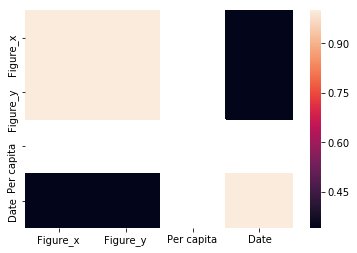

In [32]:
corr = dfX.corr(method="pearson")
sns.heatmap(corr)

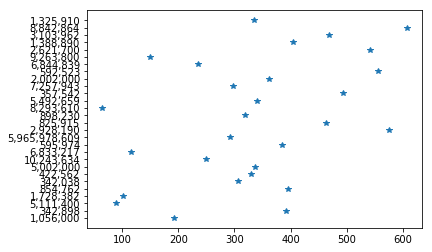

In [33]:
plt.plot( 'Figure_x', 'Figure', data=dfX, linestyle='none', marker= '*')
plt.show()

In [60]:
dfX.corr(method ='pearson') 

,Figure_x,Figure_y,Figure,Per capita,Date
Figure_x,1.000000,0.191751,0.012733,NaN,0.213494
Figure_y,0.191751,1.000000,-0.056597,NaN,0.341108
Figure,0.012733,-0.056597,1.000000,NaN,0.003641
Per capita,NaN,NaN,NaN,NaN,NaN
Date,0.213494,0.341108,0.003641,NaN,1.000000


In [63]:
dfX.corr(method = 'kendall')

,Figure_x,Figure_y,Figure,Per capita,Date
Figure_x,1.000000,0.052910,0.195767,NaN,0.077824
Figure_y,0.052910,1.000000,-0.232804,NaN,0.040468
Figure,0.195767,-0.232804,1.000000,NaN,-0.052920
Per capita,NaN,NaN,NaN,NaN,NaN
Date,0.077824,0.040468,-0.052920,NaN,1.000000


In [64]:
dfX.corr(method = 'spearman')

,Figure_x,Figure_y,Figure,Per capita,Date
Figure_x,1.000000,0.093596,0.257252,NaN,0.114438
Figure_y,0.093596,1.000000,-0.380405,NaN,0.042697
Figure,0.257252,-0.380405,1.000000,NaN,-0.059252
Per capita,NaN,NaN,NaN,NaN,NaN
Date,0.114438,0.042697,-0.059252,NaN,1.000000


In [61]:
dfX

,City,Figure_x,Figure_y,Figure,Per capita,Date,Source,Notes
0,Amsterdam,534.0,19271.0,1.056000e+06,NaN,2013,Statistics Netherlands/TNO,NaN
1,Austin,2072.0,39103.0,3.428980e+05,NaN,2016,Census Reporter,NaN
2,Bogotá,4186.0,9004.0,5.111400e+06,NaN,2018,Departamento Nacional de Estadística,NaN
3,Buenos Aires,2213.0,10080.0,1.728382e+06,NaN,2010,INDEC,NaN
4,Dublin,320.0,39571.0,8.547620e+05,NaN,2016,Census,NaN
5,Edinburgh,277.0,30615.0,3.420380e+05,NaN,2017,National Registers of Scotland (NRS),NaN
6,Helsinki,233.0,32893.0,4.225620e+05,NaN,2017,Statistics Finland,NaN
7,Hong Kong,1855.0,33601.0,5.002000e+06,NaN,2016,Census and Statistics Departmenet,NaN
8,Istanbul,79.0,25000.0,1.024363e+07,NaN,2014,Turkish Statistical Institute,NaN
9,Johannesburg,1324.0,11591.0,6.833217e+06,NaN,2011,StatSA Mid Year Population Estimates 2011,NaN


# as you can see we have tried various methods there is no correlation between the variables.

#Now we will move to another hypothesis to solution this problem

# we will use Foursquare api to survey the area for various businesses and cofrim if Italian restaurant is viable.

In [35]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import geopy




from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import os



print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [36]:
CLIENT_ID = 'WTUDUXM1UNC4YJ2YQV3BJWQXFXD4XFSMFR4Z0BAJWIGLLAEA' # your Foursquare ID
CLIENT_SECRET = 'C4SCID4BHMU1CNT4XUTRIJKW1QMMLTQPPODXGCPYHL5USAGV' # your Foursquare Secret
VERSION = '20200515'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WTUDUXM1UNC4YJ2YQV3BJWQXFXD4XFSMFR4Z0BAJWIGLLAEA
CLIENT_SECRET:C4SCID4BHMU1CNT4XUTRIJKW1QMMLTQPPODXGCPYHL5USAGV


In [37]:

address = '1367, Queen Victoria avenue, Mississauga, Ontario'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.53498249605366 -79.62144195905238


In [38]:
search_query = 'Restaurant'
radius = 500
print(search_query + ' .... OK!')

Restaurant .... OK!


In [39]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION,  radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=WTUDUXM1UNC4YJ2YQV3BJWQXFXD4XFSMFR4Z0BAJWIGLLAEA&client_secret=C4SCID4BHMU1CNT4XUTRIJKW1QMMLTQPPODXGCPYHL5USAGV&ll=43.53498249605366,-79.62144195905238&v=20200515&radius=500&limit=100'

# DATA used

# Data Used for this Capstone assignment- the approach used was to analyze and Scan all the restaurants and small business in the port credit neighborhood.
1. Foursquare Api was used. i registered for the api, created a client id and client secret
2. based on the location in portcredit the latitude and logitude for the location was found byusing geolocator
3. foursqure api was involed for a rasius of 500 around the portcredit location.
4. results were obtained and we got a Json file of 100 records
5. the response was then mapped to a Pandas data frame
6. this data frame was mapped using folium package.


In [40]:
results = requests.get(url).json()



In [41]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",False,4ca5cc2fd971b1f7e182f9e0,1324 Lorne Park Road,CA,Mississauga,Canada,Truscott,472,"[1324 Lorne Park Road (Truscott), Mississauga ...","[{'label': 'display', 'lat': 43.53119998536198...",43.531200,-79.624097,L5H 3B1,ON,Lorne Park Secondary School,v-1591651456,NaN
1,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4dd192991838a75196474e5d,1150 Lorne Park Rd,CA,Mississauga,Canada,NaN,659,"[1150 Lorne Park Rd, Mississauga ON L5H 3A7, C...","[{'label': 'display', 'lat': 43.53051, 'lng': ...",43.530510,-79.616090,L5H 3A7,ON,Anytime Fitness,v-1591651456,NaN
2,"[{'id': '4f04b1572fb6e1c99f3db0bf', 'name': 'S...",False,4f8ef556e4b0d35b8089ad22,2330 South Sheridan Way,CA,Mississauga,Canada,NaN,199,"[2330 South Sheridan Way, Mississauga ON L5J 2...","[{'label': 'display', 'lat': 43.53325357693356...",43.533254,-79.622085,L5J 2M4,ON,Public Storage,v-1591651456,NaN
3,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",False,4e60449b7d8b854088b48470,1150 Lorne Park Dr.,CA,Mississauga,Canada,at Queen Victoria Ave.,639,"[1150 Lorne Park Dr. (at Queen Victoria Ave.),...","[{'label': 'display', 'lat': 43.53103989841665...",43.531040,-79.615677,L5H 3A5,ON,Battaglia's Lorne Park Marketplace,v-1591651456,NaN
4,"[{'id': '4e39a956bd410d7aed40cbc3', 'name': 'T...",False,4f89a94de4b013a980b5dda0,NaN,CA,Mississauga,Canada,NaN,1328,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.54644692756784...",43.546447,-79.625995,NaN,ON,White Oaks Park Tennis Club,v-1591651456,NaN


In [42]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Lorne Park Secondary School,High School,1324 Lorne Park Road,CA,Mississauga,Canada,Truscott,472,"[1324 Lorne Park Road (Truscott), Mississauga ...","[{'label': 'display', 'lat': 43.53119998536198...",43.531200,-79.624097,L5H 3B1,ON,4ca5cc2fd971b1f7e182f9e0
1,Anytime Fitness,Gym / Fitness Center,1150 Lorne Park Rd,CA,Mississauga,Canada,NaN,659,"[1150 Lorne Park Rd, Mississauga ON L5H 3A7, C...","[{'label': 'display', 'lat': 43.53051, 'lng': ...",43.530510,-79.616090,L5H 3A7,ON,4dd192991838a75196474e5d
2,Public Storage,Storage Facility,2330 South Sheridan Way,CA,Mississauga,Canada,NaN,199,"[2330 South Sheridan Way, Mississauga ON L5J 2...","[{'label': 'display', 'lat': 43.53325357693356...",43.533254,-79.622085,L5J 2M4,ON,4f8ef556e4b0d35b8089ad22
3,Battaglia's Lorne Park Marketplace,Grocery Store,1150 Lorne Park Dr.,CA,Mississauga,Canada,at Queen Victoria Ave.,639,"[1150 Lorne Park Dr. (at Queen Victoria Ave.),...","[{'label': 'display', 'lat': 43.53103989841665...",43.531040,-79.615677,L5H 3A5,ON,4e60449b7d8b854088b48470
4,White Oaks Park Tennis Club,Tennis Court,NaN,CA,Mississauga,Canada,NaN,1328,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.54644692756784...",43.546447,-79.625995,NaN,ON,4f89a94de4b013a980b5dda0
5,Woodeden Park,Park,NaN,CA,Mississauga,Canada,NaN,1092,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.54455410321979...",43.544554,-79.618471,NaN,ON,5042bb9be4b06c0c2c43cb91
6,White Oaks Montessori,None,1200 Vanier Dr,CA,Mississauga,Canada,NaN,978,"[1200 Vanier Dr, Mississauga ON L5H 4C7, Canada]","[{'label': 'display', 'lat': 43.543138, 'lng':...",43.543138,-79.625967,L5H 4C7,ON,4d6ebdc43d6a224b00070f85
7,Lorne park lecture hall,High School,NaN,CA,Mississauga,Canada,NaN,804,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.53504016311795...",43.535040,-79.611473,NaN,ON,4ed661732c5b3d826ea12db7
8,Stoney Pizza,Pizza Place,1200 Vanier Dr,CA,Mississauga,Canada,NaN,945,"[1200 Vanier Dr, Mississauga ON L5H 4C7, Canada]","[{'label': 'display', 'lat': 43.542743, 'lng':...",43.542743,-79.626208,L5H 4C7,ON,520bedfd11d22b2273e5dfb6
9,Pioneer Energy,Gas Station,1095 Lakeshore Rd W,CA,Mississauga,Canada,Lorne Park Rd,1142,"[1095 Lakeshore Rd W (Lorne Park Rd), Mississa...","[{'label': 'display', 'lat': 43.531594, 'lng':...",43.531594,-79.608081,L5H 1J3,ON,4b78aa73f964a520e7dc2ee3


In [43]:
df = dataframe_filtered

In [44]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import sys
!{sys.executable} -m pip install folium


     |████████████████████████████████| 102kB 5.0MB/s ta 0:00:01


In [ ]:
import folium

In [ ]:
m = folium.Map(location=[latitude, longitude],
                       width=750, height=500)

# map of South mississauga

In [46]:
m

In [47]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker to represent my house in portcredit
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='New Restaurant',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the businesses as blue circle markers
for lat, lng, label in zip(df.lat, df.lng, df.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [48]:
df.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
categories,,,,,,,,,,,,,,
Arts & Crafts Store,1,0,1,0,1,0,1,1,1,1,1,0,0,1
Assisted Living,2,1,2,1,2,0,2,2,2,2,2,0,1,2
Automotive Shop,2,2,2,2,2,1,2,2,2,2,2,0,2,2
Bakery,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Bank,2,1,2,2,2,1,2,2,2,2,2,1,2,2
Bistro,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Boat or Ferry,1,0,1,0,1,0,1,1,1,1,1,0,0,1
Breakfast Spot,1,0,1,1,1,0,1,1,1,1,1,0,1,1
Building,2,0,2,2,2,0,2,2,2,2,2,0,2,2


# As you can see we have  pizza places, restaurants in the data set

In [82]:
df['categories'].str.contains("Restaurant")

0     False
1     False
2     False
3     False
4     False
5     False
6      None
7     False
8      None
9      None
10     None
11     None
12     None
13     None
14     True
15     None
16    False
17    False
18     None
19     None
20     None
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
70    False
71    False
72    False
73    False
74    False
75     True
76    False
77    False
78    False
79    False
80    False
81    False
82     None
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91    False
92    False
93    False
94    False
95    False
96    False
97    False
98    False
99    False
Name: categories, Length: 100, dtype: object

In [52]:
df =df.set_index('categories').filter(like='Restaurant', axis=0)

In [54]:
df.head()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
categories,,,,,,,,,,,,,,
Chinese Restaurant,Timjas Thai Chinese,17-1107 Lorne Park Rd,CA,Mississauga,Canada,NaN,805,"[17-1107 Lorne Park Rd, Mississauga ON L5H 3A1...","[{'label': 'display', 'lat': 43.531459, 'lng':...",43.531459,-79.612724,L5H 3A1,ON,5601e09b498e98acc4e4fe94
Sushi Restaurant,Ichiban Sushi House,NaN,CA,Mississauga,Canada,NaN,411,"[Mississauga ON, Canada]","[{'label': 'display', 'lat': 43.53371213499307...",43.533712,-79.626236,NaN,ON,4c9facd346978cfa142ead7f
Chinese Restaurant,James Wok,1107 Lorne Park Road,CA,Mississauga,Canada,NaN,826,"[1107 Lorne Park Road, Mississauga ON L5H 3A1,...","[{'label': 'display', 'lat': 43.53197945903734...",43.531979,-79.612070,L5H 3A1,ON,4bc0fc1e461576b071327b32
Xinjiang Restaurant,Ta’am,1107 Lorne Park Rd,CA,Mississauga,Canada,NaN,784,"[1107 Lorne Park Rd, Mississauga ON L5H 3A1, C...","[{'label': 'display', 'lat': 43.531929, 'lng':...",43.531929,-79.612684,L5H 3A1,ON,5cdc73873731ee002cb56197
Sushi Restaurant,Orange Fish Sushi House,NaN,CA,NaN,Canada,NaN,797,[Canada],"[{'label': 'display', 'lat': 43.53200169277666...",43.532002,-79.612454,NaN,NaN,4da77aaaa86e68edb7c870dc


In [ ]:
********** End of Note book ************